## COMPULSORY TASK 1

This dataset is from the US Arrests Kaggle challenge (link). A description of the
data is given as: “This data set contains statistics, in arrests per 100,000 residents,
for assault, murder, and rape in each of the 50 US states in 1973. Also given is the
percent of the population living in urban areas.”


● Use the dataset UsArrests.csv included in this folder to generate a similar
in-depth PCA report of the data. Explore as much as you can, motivate the
pre-processing steps you take, and interpret the outcomes of any analyses.


● You are also required to do an application of two clustering techniques and
an analysis of the clusters they generate. Try and see if you can find anything
common within each cluster that has been found.


● Push all the work that you have generated for this project to GitHub.

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline

#from mpl_toolkits.plot3d import Axes3D

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize

from sklearn.decomposition import PCA
from pca import pca

from sklearn.metrics import accuracy_score, silhouette_score

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

# Ignoring OMP thread count with k-means
import warnings
warnings.filterwarnings('ignore')


In [2]:
# load data
df = pd.read_csv("UsArrests.csv")
# Rename column
df.rename(columns={'City': 'State'}, inplace=True)
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### DATA EXPLORATION

In [3]:
# Understanding data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


Our dataframe provides information regarding number of arrests made per 100,000 residents for 3 types of crimes (murder, assault and rape) in all 50 states in America. Features are state, murder, assault, urban population and rape.

This report will analyse via PCA and hierarchical clustering the behaviour of the types of crime in America.

In [4]:
# convert all data type to float for homogeneity
df["Assault"] = df["Assault"].astype("float64")
df["UrbanPop"] = df["UrbanPop"].astype("float64")
df.dtypes

State        object
Murder      float64
Assault     float64
UrbanPop    float64
Rape        float64
dtype: object

<AxesSubplot: >

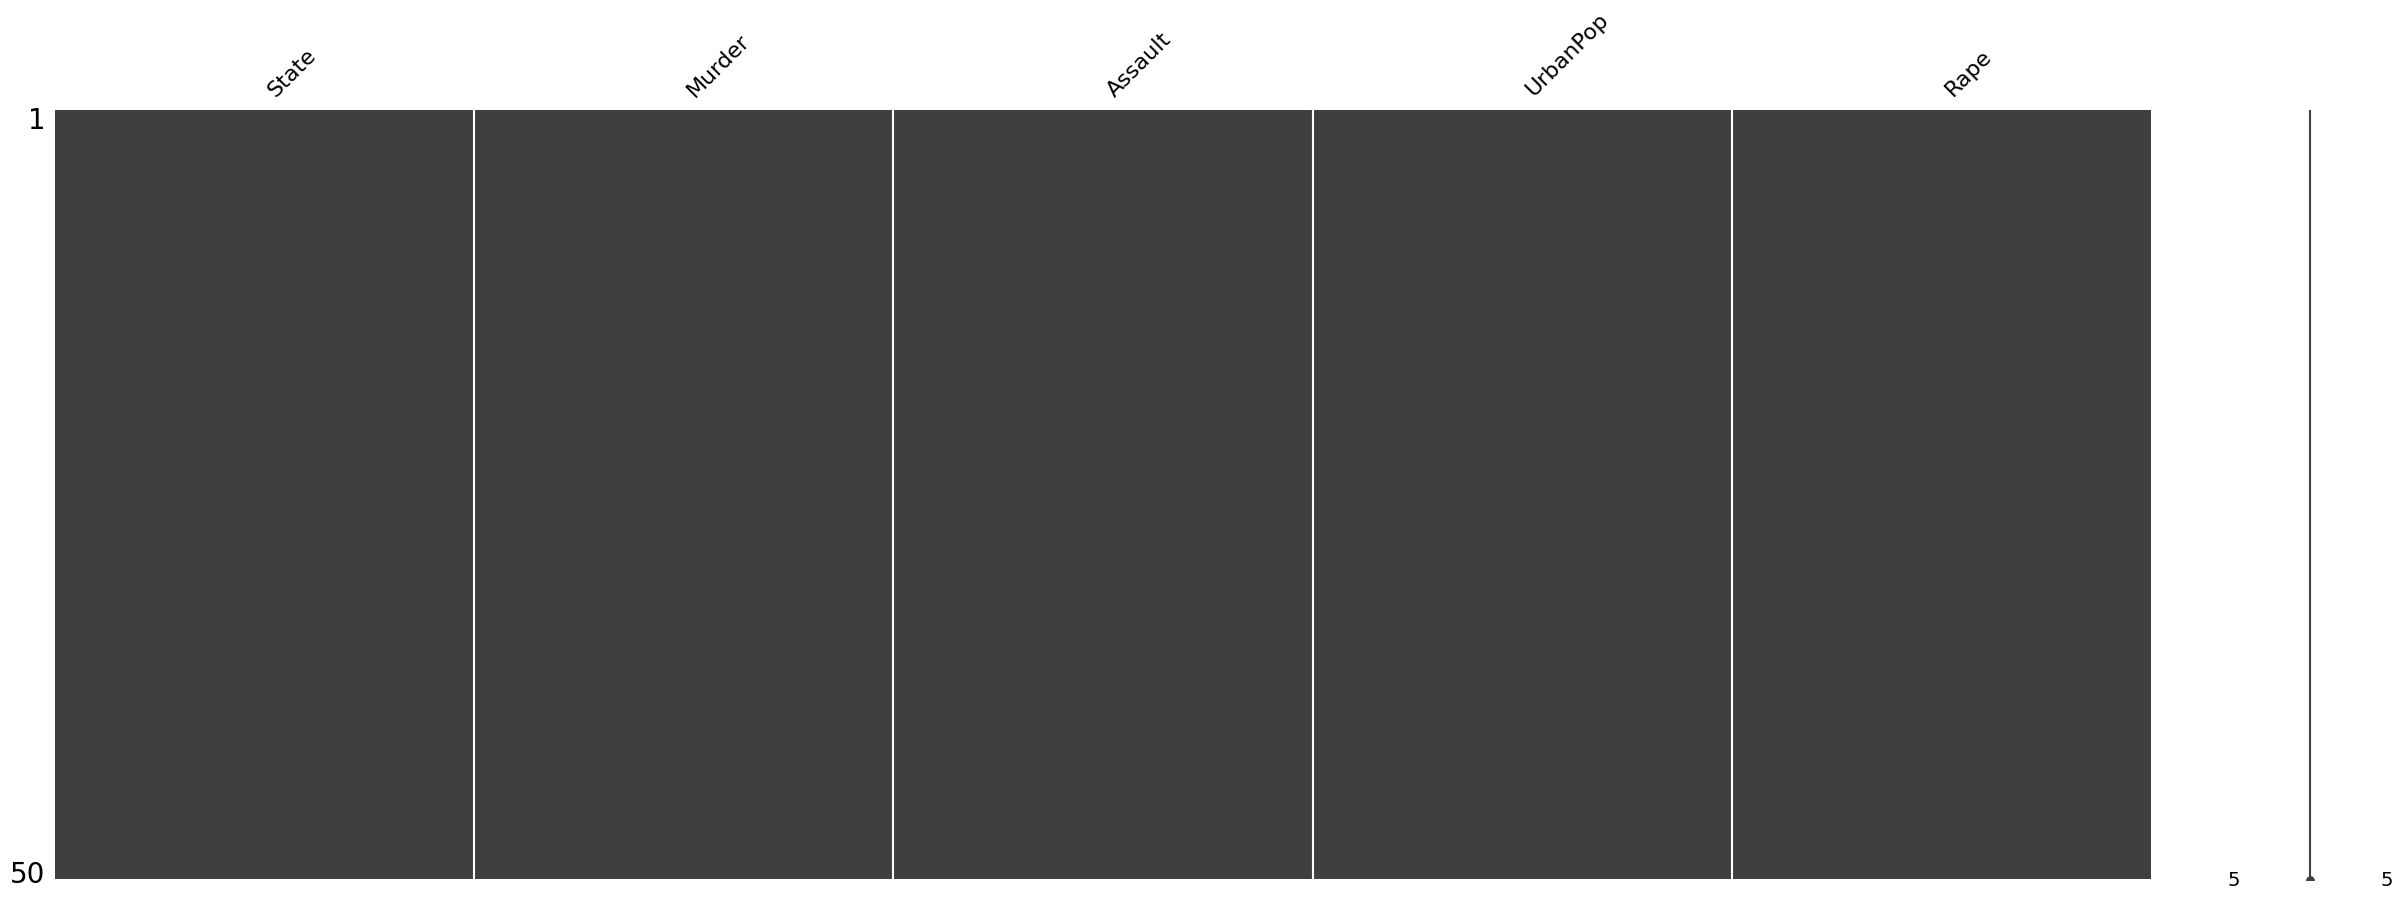

In [5]:
# Plot graphic of missing values
missingno.matrix(df, figsize = (30,10))

In [6]:
# Statistical summary of dataset
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


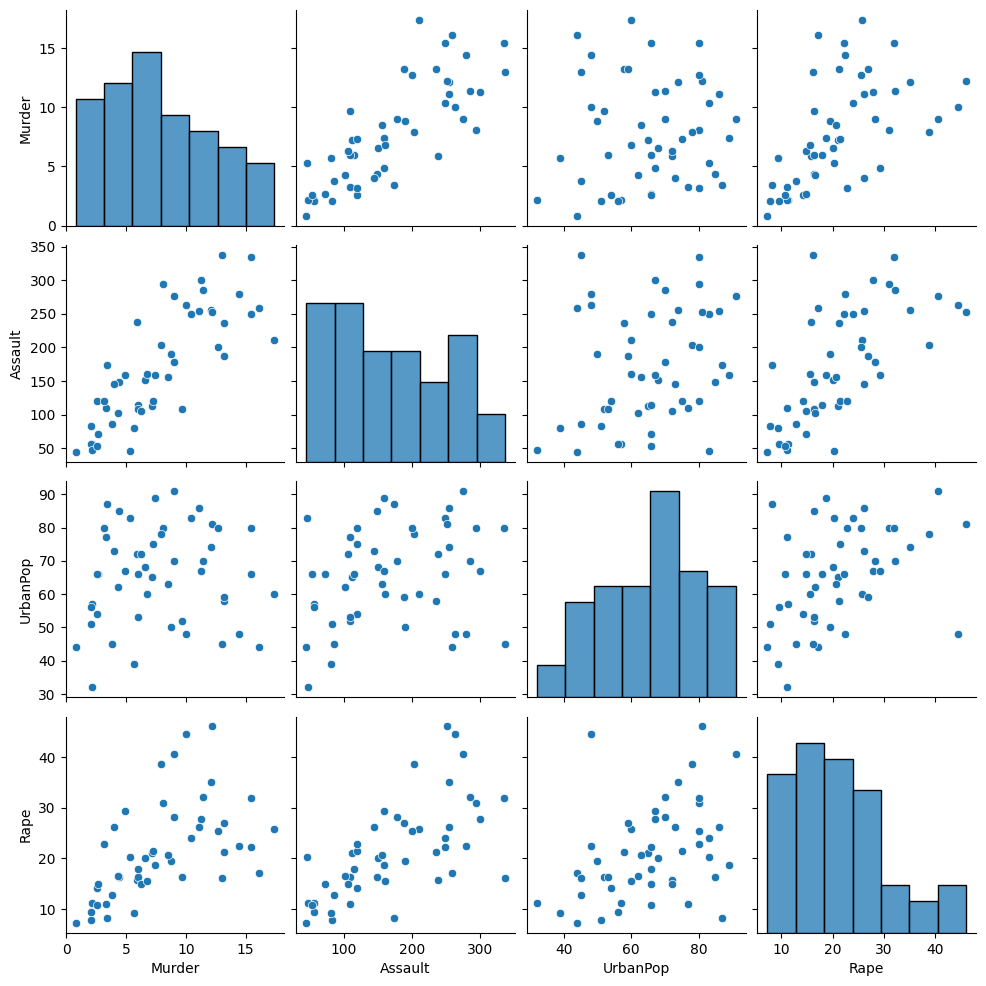

In [7]:
# Let's take a look at the distribution here
sns.pairplot(data=df)

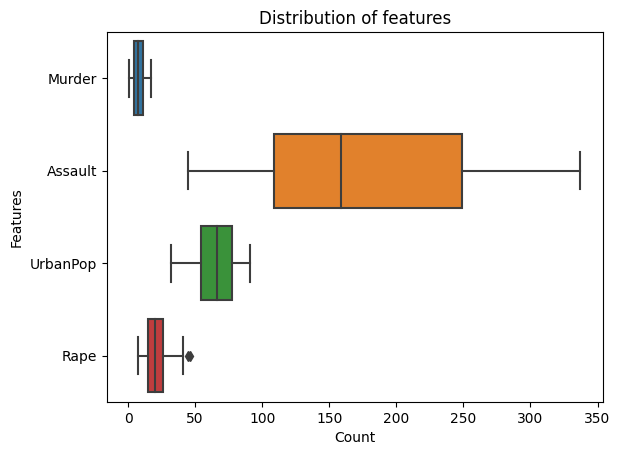

In [8]:
sns.boxplot(data=df, orient="h")
plt.ylabel("Features")
plt.xlabel("Count")
plt.title("Distribution of features")
plt.show()

From this we can appreciate that our features involve a wide range of values. Some are represented by units and others by percentages. And, present diverse disributions. Therefore, our data needs scalling.

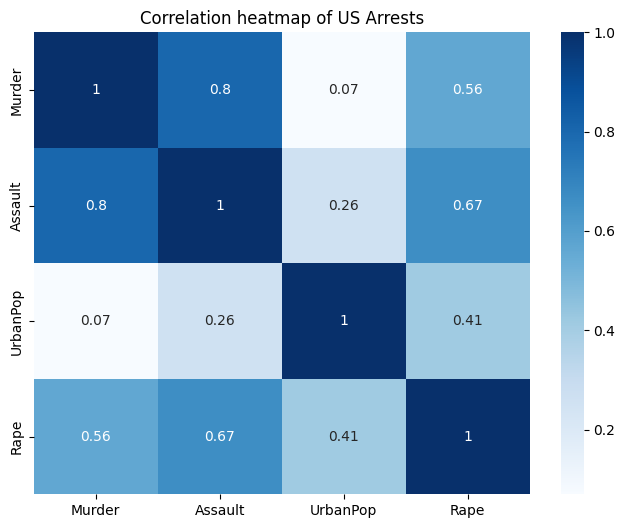

In [9]:
# Feature correlation
plt.figure(figsize=(8,6))
arrest_corr = df.corr()

sns.heatmap(arrest_corr, annot=True, cmap=plt.cm.Blues)
plt.title("Correlation heatmap of US Arrests")
plt.show()

From this we can observe there is a positive correlation between Assault, Murder and Rape. Being Murder and Assault the most correlated. For PCA analysis, correlation among features is relevant for dimensionality reduction

### DATA PRE-PROCESSING
Data scaling

In [10]:
# Select independent and stanfardise features
scaled = StandardScaler().fit_transform(df.iloc[:,1:5])

# Scale dataframe
df_scale = pd.DataFrame(scaled, columns = df.columns[1:5])
df_scale.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


### PCA
PCA analysis selects comonents that attribute the greatest factor in determining our desired outcome. (variance factor 80%-99%, not below 60%)

In [11]:
# PCA analysis to explaine variance 
PcA = PCA().fit(df_scale)

PcA.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

From this we can see that the first two components explain 86.7% of the variance in our data (62% and 24.7%, respectively).

In [12]:
# Proceeding with 2 components
PcA = PCA(n_components = 2)

# obtain components
principal_components = PcA.fit_transform(df_scale)

# transform the components into a pandas data frame
PcA_df = pd.DataFrame(principal_components, index=df.index, columns = ["PC1", "PC2"])
PcA_df["State"] = df["State"]

PcA_df.head()

,PC1,PC2,State
0,0.985566,1.133392,Alabama
1,1.950138,1.073213,Alaska
2,1.763164,-0.745957,Arizona
3,-0.141420,1.119797,Arkansas
4,2.523980,-1.542934,California


[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.


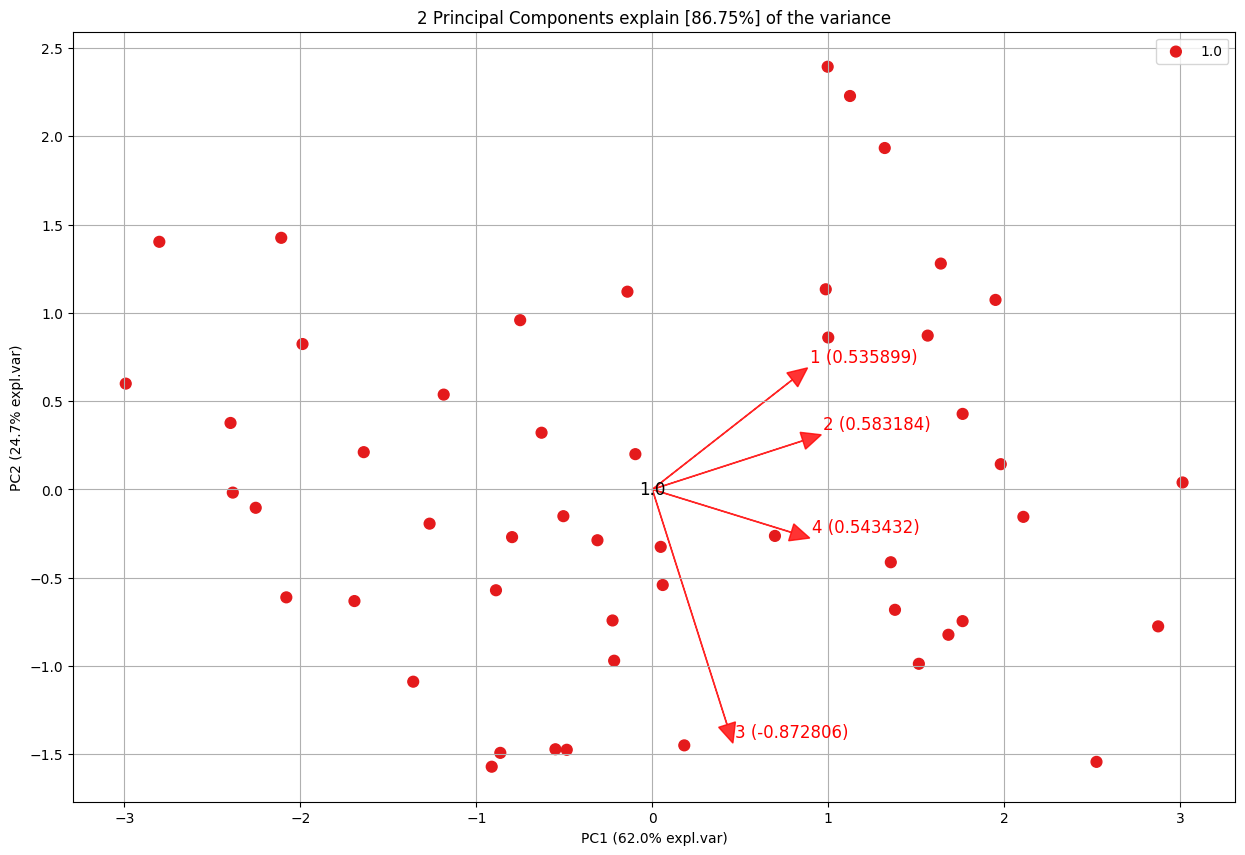

In [13]:
# plot to represent components within dataframe
model = pca(n_components=2)

results = model.fit_transform(scaled)

# Biplot with total number of features
fig, ax = model.biplot(n_feat=4, )

The above plot shows each observation (states) as a point and each feature (variable) as a vector. 
All our 4 features (Murder, Assault, UrbanPop and Rape) have a positive correlation with our first principal component, while UrbanPop (vector 3) has a negative correlation with the second principal component and the highest correlation. 

### HIERARCHICAL CLUSTERING

In [14]:
# Drop unecessary column
#PcA_df.drop('State', axis=1, inplace=True)
PcA_df.set_index('State', inplace=True)

# Select useful features
X = PcA_df[['PC1','PC2']].values.reshape(-1,2)  

print('Data size:')
print(X.shape)

# Select K
K = 2

Data size:
(50, 2)


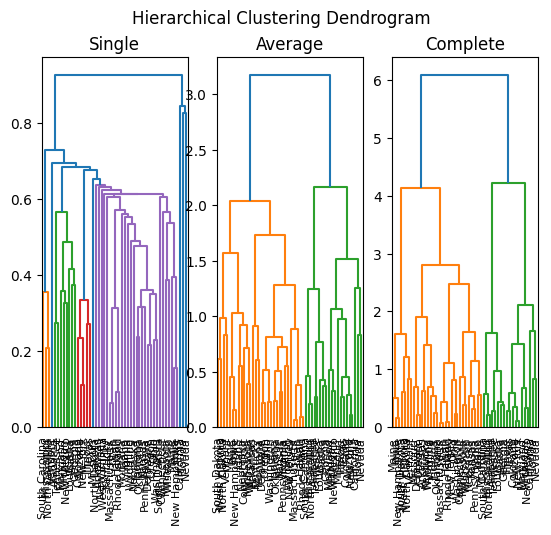

In [15]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(PcA_df)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(PcA_df, method='single'), labels=PcA_df.index, ax=ax1) #change method: eg. single, average, complete...
ax2.set_title("Average")
dendrogram(linkage(PcA_df, method='average'), labels=PcA_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(PcA_df, method='complete'), labels=PcA_df.index, ax=ax3)
plt.show()

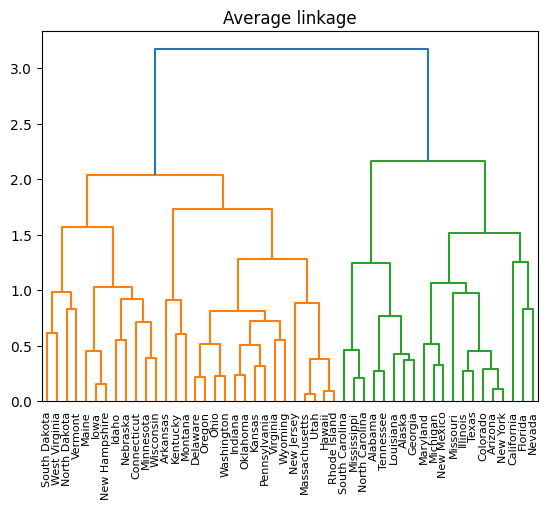

In [16]:
plt.title("Average linkage")
dendrogram(linkage(PcA_df, method='average'), labels=PcA_df.index)
plt.show()

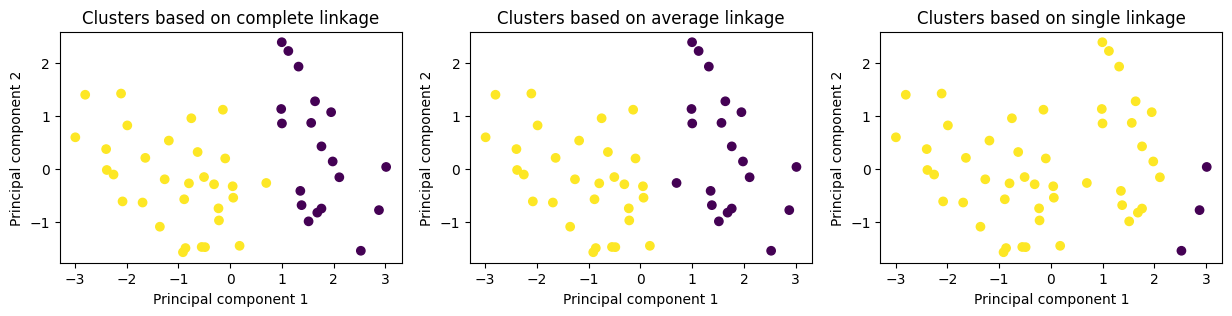

In [17]:
plt.figure(figsize=[15,3])

linkage_types = ['complete', 'average', 'single']

for i, l in enumerate(linkage_types):
  plt.subplot(1, 3, i+1)
  
  cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage=l)
  cluster.fit_predict(X)

  ax = plt.scatter(X[:,0], X[:,1], c=cluster.labels_)
  
  plt.title('Clusters based on {} linkage'.format(l))
  plt.xlabel('Principal component 1')
  plt.ylabel('Principal component 2')
 
L = 'average'

Text(0, 0.5, 'Principal component 2')

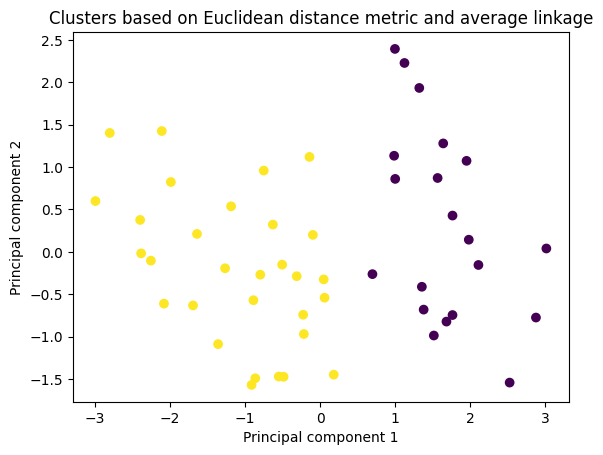

In [18]:
cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage=L)
cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster.labels_)
plt.title('Clusters based on Euclidean distance metric and average linkage')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

The data points in the right (purple) belong to states with the higher Murder, Assault, and Rape crimes. whereas, points on the left (yellow) are states with less crime. The points on the lower part of the graph are the states with less urban population. 

### K-MEANS CLUSTERING

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


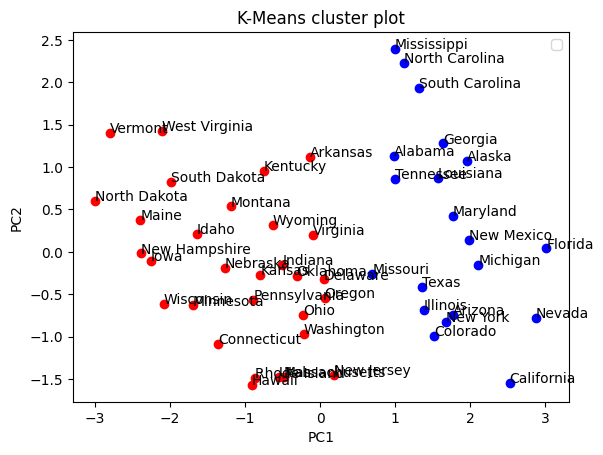

In [19]:
# We extract the first two components
x = PcA_df['PC1'].values  
y = PcA_df['PC2'].values 
states = PcA_df.index
# Fit k-means
k=2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(PcA_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = states[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.legend()


In [25]:
# Groups - translate to readable names
clusters = pd.DataFrame()

group0 = np.array(states)[group0_indices]
group1 = np.array(states)[group1_indices]

print("Red Group:\n {}\n\n".format(group0))
print("Blue Group: \n {}\n\n".format(group1))


Red Group:
 ['Arkansas' 'Connecticut' 'Delaware' 'Hawaii' 'Idaho' 'Indiana' 'Iowa'
 'Kansas' 'Kentucky' 'Maine' 'Massachusetts' 'Minnesota' 'Montana'
 'Nebraska' 'New Hampshire' 'New Jersey' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Dakota' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


Blue Group: 
 ['Alabama' 'Alaska' 'Arizona' 'California' 'Colorado' 'Florida' 'Georgia'
 'Illinois' 'Louisiana' 'Maryland' 'Michigan' 'Mississippi' 'Missouri'
 'Nevada' 'New Mexico' 'New York' 'North Carolina' 'South Carolina'
 'Tennessee' 'Texas']


